In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 5.6 MB/s eta 0:00:27
    --------------------------------------- 2.1/150.0 MB 5.1 MB/s eta 0:00:29
    --------------------------------------- 2.9/150.0 MB 4.4 MB/s eta 0:00:34
   - -------------------------------------- 3.9/150.0 MB 4.5 MB/s eta 0:00:33
   - -------------------------------------- 4.7/150.0 MB 4.5 MB/s eta 0:00:33
   - -------------------------------------- 6.0/150.0 MB 4.6 MB/s eta 0:00:32
   - -------------------------------------- 7.1/150.0 MB 4.7 MB/s eta 0:00:31
   -- ------------------------------------- 8.1/150.0 MB 4.7 MB/s eta 0:00:30
   -- ------------------------------------- 9.2/150.0 MB 4.8 MB/s eta 0:00:30
   -- ------------------------------------- 10.2/150.0 MB 4.8 MB/s eta 0:00:30
   --- ------------------------------------ 11.3/150.0 MB 4.8 MB/s eta 0:00:30
   --- ------------------------------------ 12.3/150.0 MB 4.8 MB/s et

In [17]:
from xgboost import XGBClassifier

In [9]:
df = pd.read_csv('../data/processed_data.csv')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   float64
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

In [11]:
X = df.drop('Churn',axis=1)
y = df['Churn']

#We will be spliting the data into training and test subdatasets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#here we will be trainig  a logisitc regression model
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

y_pred_log = log_reg.predict(X_test)

print(accuracy_score(y_test,y_pred_log))
print(confusion_matrix(y_test,y_pred_log))
print(classification_report(y_test,y_pred_log))

0.8211497515968772
[[934 102]
 [150 223]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



In [14]:
#here we will be training a random forrest model
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_rf_pred = rf.predict(X_test)

print(accuracy_score(y_test, y_rf_pred))
print(confusion_matrix(y_test, y_rf_pred))
print(classification_report(y_test, y_rf_pred))


0.7934705464868701
[[945  91]
 [200 173]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [18]:
#Here we will be training XGBoost  

XGB = XGBClassifier()

XGB.fit(X_train,y_train)

y_XGB_pred = XGB.predict(X_test)
print(accuracy_score(y_test,y_XGB_pred))
print(confusion_matrix(y_test,y_XGB_pred))
print(classification_report(y_test,y_XGB_pred))

0.7892122072391767
[[926 110]
 [187 186]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.63      0.50      0.56       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



Now lets tune all these moddels and try to get better results

In [21]:
#Tunning and analysing the Logistic Regression Model
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters for Logistic Regression:", grid.best_params_)

Best Parameters for Logistic Regression: {'C': 100}


Top 10 Important Features (Logistic Regression):
Contract_Two year                 1.393039
tenure                            1.338958
InternetService_Fiber optic       0.992466
Contract_One year                 0.636088
TotalCharges                      0.626486
PhoneService_Yes                  0.515758
OnlineSecurity_Yes                0.402374
StreamingMovies_Yes               0.367158
PaperlessBilling_Yes              0.332317
PaymentMethod_Electronic check    0.323456
dtype: float64


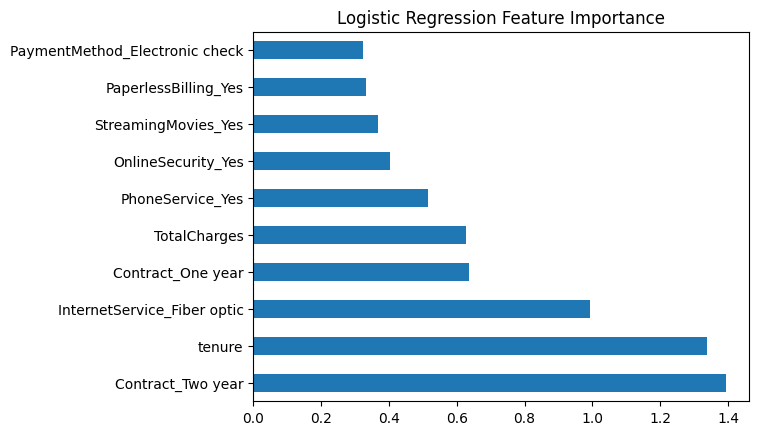

In [22]:
log_coeff = pd.Series(log_reg.coef_[0], index=X.columns).abs().sort_values(ascending=False)
print("Top 10 Important Features (Logistic Regression):")
print(log_coeff.head(10))

log_coeff.head(10).plot(kind='barh', title="Logistic Regression Feature Importance")
plt.show()

Lets take a look at Random Forest

In [23]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid.best_params_)

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


Top 10 Important Features (Random Forest):
TotalCharges                      0.194568
MonthlyCharges                    0.168315
tenure                            0.167937
PaymentMethod_Electronic check    0.035498
InternetService_Fiber optic       0.034960
Contract_Two year                 0.032942
gender_Male                       0.028236
OnlineSecurity_Yes                0.027543
PaperlessBilling_Yes              0.026096
Contract_One year                 0.024988
dtype: float64


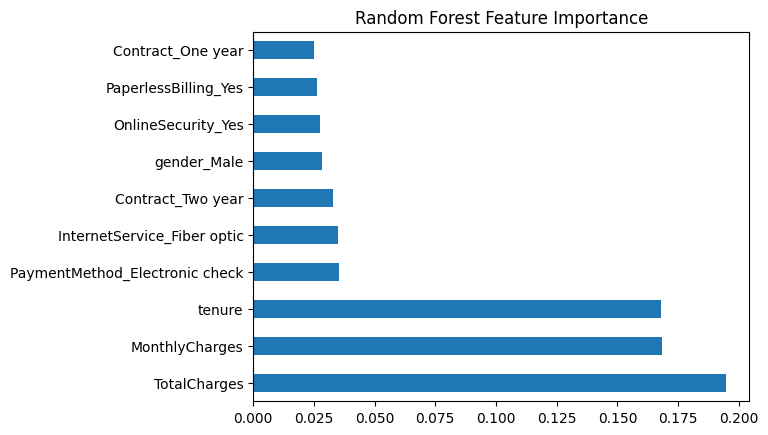

In [25]:
rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 Important Features (Random Forest):")
print(rf_importance.head(10))

rf_importance.head(10).plot(kind='barh', title="Random Forest Feature Importance")
plt.show()

And now lets take a look at XGBoost

In [26]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

grid = GridSearchCV(XGBClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters for XGBoost:", grid.best_params_)

Best Parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}


Top 10 Important Features (XGBoost):
InternetService_Fiber optic       0.334715
Contract_Two year                 0.182862
InternetService_No                0.152917
Contract_One year                 0.076980
tenure                            0.025021
PhoneService_Yes                  0.023437
StreamingMovies_Yes               0.022337
PaymentMethod_Electronic check    0.015277
MultipleLines_Yes                 0.013774
TechSupport_Yes                   0.013629
dtype: float32


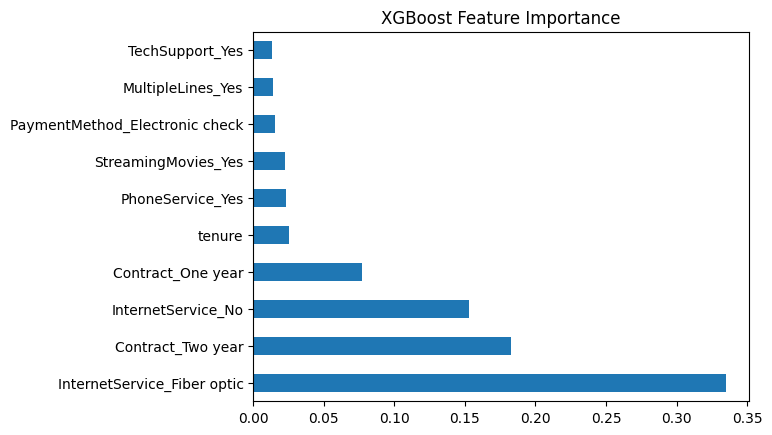

In [27]:
xgb_importance = pd.Series(XGB.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 Important Features (XGBoost):")
print(xgb_importance.head(10))

xgb_importance.head(10).plot(kind='barh', title="XGBoost Feature Importance")
plt.show()